Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from more_itertools import locate
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, precision_recall_curve, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
base_path = '/content/gdrive/MyDrive/Uni./Data Mining/Project/'

Mounted at /content/gdrive


## Getting the Data

In [ ]:
df = pd.read_csv(base_path + 'diabetes.csv')

In [ ]:
df

,Unnamed: 0,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
0,0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


## Preprocessing

In [ ]:
df.columns

Index(['Unnamed: 0', 'Diabetes_binary', 'HighBP', 'High Cholesterol',
       'Cholesterol Check', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'Physical Activity', 'Fruits', 'Veggies', 'Heavy Alcohol Consumption',
       'Any Health Care', 'No Doctor because of Cost', 'General Health',
       'Mental Health', 'Physical Health', 'Difficulty Walking', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

Delete unnecessary column `Unnamed: 0`

In [ ]:
del df["Unnamed: 0"]
df

,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,Fruits,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


Replacing `white spaces` in column names with `_`

In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Diabetes_binary', 'HighBP', 'High_Cholesterol', 'Cholesterol_Check',
       'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Physical_Activity',
       'Fruits', 'Veggies', 'Heavy_Alcohol_Consumption', 'Any_Health_Care',
       'No_Doctor_because_of_Cost', 'General_Health', 'Mental_Health',
       'Physical_Health', 'Difficulty_Walking', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Replacing `white spaces` in `General_Health` column with `_`

In [ ]:
df["General_Health"] = df["General_Health"].str.replace(' ', '_')
df["General_Health"]

0          Medium
1          Medium
2            High
3          Medium
4            Good
           ...   
70687         Low
70688        Good
70689    Very_Low
70690         Low
70691        Good
Name: General_Health, Length: 70692, dtype: object

### First lets check all the columns with `binary` values

In [ ]:
label_is_null = pd.isnull(df["Diabetes_binary"])

try:
  list(label_is_null).index(True)
  print("There are null values in label column")
except:
  print("There are no null values in label column")

There are no null values in label column


In [ ]:
indices_null = list(locate(df["HighBP"], lambda x: x not in [0, 1] ))
indices_null

[]

In [ ]:
indices_null = list(locate(df["High_Cholesterol"], lambda x: x not in [0, 1] ))
indices_null

[]

In [ ]:
indices_null = list(locate(df["Cholesterol_Check"], lambda x: x not in [0, 1] ))
indices_null

[]

In [ ]:
indices_null = list(locate(df["Smoker"], lambda x: x not in [0, 1] ))
indices_null

[]

In [ ]:
indices_null = list(locate(df["Stroke"], lambda x: x not in [0, 1] ))
indices_null

[]

In [ ]:
indices_null = list(locate(df["HeartDiseaseorAttack"], lambda x: x not in [0, 1] ))
indices_null

[11691]

In [ ]:
df.iloc[11691]

Diabetes_binary               0.0
HighBP                        0.0
High_Cholesterol              0.0
Cholesterol_Check             1.0
BMI                          27.0
Smoker                        0.0
Stroke                        0.0
HeartDiseaseorAttack          NaN
Physical_Activity             NaN
Fruits                        NaN
Veggies                       NaN
Heavy_Alcohol_Consumption     NaN
Any_Health_Care               NaN
No_Doctor_because_of_Cost     NaN
General_Health                NaN
Mental_Health                 NaN
Physical_Health               NaN
Difficulty_Walking            NaN
Sex                           NaN
Age                           NaN
Education                     NaN
Income                        NaN
Name: 11691, dtype: object

This entry has a lot of `NaN` values so its better to delete it completely

In [ ]:
df = df.drop(11691)

In [ ]:
indices_null = list(locate(df["HeartDiseaseorAttack"], lambda x: x not in [0, 1] ))
indices_null

[]

In [ ]:
indices_null = list(locate(df["Physical_Activity"], lambda x: x not in [0, 1] ))
indices_null

[]

In [ ]:
indices_null = list(locate(df["Fruits"], lambda x: x not in [0, 1] ))
indices_null

[10000]

In [ ]:
df.iloc[10000]

Diabetes_binary               0.0
HighBP                        0.0
High_Cholesterol              1.0
Cholesterol_Check             1.0
BMI                          21.0
Smoker                        1.0
Stroke                        1.0
HeartDiseaseorAttack          0.0
Physical_Activity             0.0
Fruits                        NaN
Veggies                       1.0
Heavy_Alcohol_Consumption     0.0
Any_Health_Care               1.0
No_Doctor_because_of_Cost     0.0
General_Health                Low
Mental_Health                 0.0
Physical_Health              30.0
Difficulty_Walking            0.0
Sex                          male
Age                          13.0
Education                    Cat5
Income                       Cat7
Name: 10000, dtype: object

I fill this cell with value `1` just because the patient consumes `veggies` and does not have `heavy alcohol consumtion`

In [ ]:
df.at[10000, 'Fruits'] = 1.0
df.iloc[10000]

Diabetes_binary               0.0
HighBP                        0.0
High_Cholesterol              1.0
Cholesterol_Check             1.0
BMI                          21.0
Smoker                        1.0
Stroke                        1.0
HeartDiseaseorAttack          0.0
Physical_Activity             0.0
Fruits                        1.0
Veggies                       1.0
Heavy_Alcohol_Consumption     0.0
Any_Health_Care               1.0
No_Doctor_because_of_Cost     0.0
General_Health                Low
Mental_Health                 0.0
Physical_Health              30.0
Difficulty_Walking            0.0
Sex                          male
Age                          13.0
Education                    Cat5
Income                       Cat7
Name: 10000, dtype: object

In [ ]:
indices_null = list(locate(df["Veggies"], lambda x: x not in [0, 1] ))
indices_null

[]

In [ ]:
indices_null = list(locate(df["Heavy_Alcohol_Consumption"], lambda x: x not in [0, 1] ))
indices_null

[]

In [ ]:
indices_null = list(locate(df["Any_Health_Care"], lambda x: x not in [0, 1] ))
indices_null

[19999]

In [ ]:
df.iloc[19999]

Diabetes_binary                 0.0
HighBP                          1.0
High_Cholesterol                0.0
Cholesterol_Check               1.0
BMI                            26.0
Smoker                          0.0
Stroke                          0.0
HeartDiseaseorAttack            0.0
Physical_Activity               1.0
Fruits                          1.0
Veggies                         1.0
Heavy_Alcohol_Consumption       0.0
Any_Health_Care                 NaN
No_Doctor_because_of_Cost       0.0
General_Health                 Good
Mental_Health                   0.0
Physical_Health                 0.0
Difficulty_Walking              1.0
Sex                          female
Age                            13.0
Education                      Cat3
Income                         Cat5
Name: 20000, dtype: object

She seems healthy so she probably has `Health care`

In [ ]:
df['Any_Health_Care'].fillna(1.0, inplace=True)
df.iloc[19999]

Diabetes_binary                 0.0
HighBP                          1.0
High_Cholesterol                0.0
Cholesterol_Check               1.0
BMI                            26.0
Smoker                          0.0
Stroke                          0.0
HeartDiseaseorAttack            0.0
Physical_Activity               1.0
Fruits                          1.0
Veggies                         1.0
Heavy_Alcohol_Consumption       0.0
Any_Health_Care                 1.0
No_Doctor_because_of_Cost       0.0
General_Health                 Good
Mental_Health                   0.0
Physical_Health                 0.0
Difficulty_Walking              1.0
Sex                          female
Age                            13.0
Education                      Cat3
Income                         Cat5
Name: 20000, dtype: object

In [ ]:
indices_null = list(locate(df["No_Doctor_because_of_Cost"], lambda x: x not in [0, 1] ))
indices_null

[29999]

In [ ]:
df.iloc[29999]

Diabetes_binary                 0.0
HighBP                          0.0
High_Cholesterol                0.0
Cholesterol_Check               1.0
BMI                            22.0
Smoker                          0.0
Stroke                          0.0
HeartDiseaseorAttack            0.0
Physical_Activity               1.0
Fruits                          1.0
Veggies                         1.0
Heavy_Alcohol_Consumption       0.0
Any_Health_Care                 1.0
No_Doctor_because_of_Cost       NaN
General_Health                 Good
Mental_Health                   0.0
Physical_Health                 0.0
Difficulty_Walking              0.0
Sex                          female
Age                             6.0
Education                      Cat6
Income                         Cat5
Name: 30000, dtype: object

Don't have any idea about it. Lets just put 0.0

In [ ]:
df['No_Doctor_because_of_Cost'].fillna(0.0, inplace=True)
df.iloc[29999]

Diabetes_binary                 0.0
HighBP                          0.0
High_Cholesterol                0.0
Cholesterol_Check               1.0
BMI                            22.0
Smoker                          0.0
Stroke                          0.0
HeartDiseaseorAttack            0.0
Physical_Activity               1.0
Fruits                          1.0
Veggies                         1.0
Heavy_Alcohol_Consumption       0.0
Any_Health_Care                 1.0
No_Doctor_because_of_Cost       0.0
General_Health                 Good
Mental_Health                   0.0
Physical_Health                 0.0
Difficulty_Walking              0.0
Sex                          female
Age                             6.0
Education                      Cat6
Income                         Cat5
Name: 30000, dtype: object

In [ ]:
indices_null = list(locate(df["Difficulty_Walking"], lambda x: x not in [0, 1] ))
indices_null

[39999]

In [ ]:
df.iloc[39999]

Diabetes_binary                 1.0
HighBP                          1.0
High_Cholesterol                0.0
Cholesterol_Check               1.0
BMI                            32.0
Smoker                          1.0
Stroke                          0.0
HeartDiseaseorAttack            0.0
Physical_Activity               0.0
Fruits                          1.0
Veggies                         1.0
Heavy_Alcohol_Consumption       0.0
Any_Health_Care                 1.0
No_Doctor_because_of_Cost       0.0
General_Health               Medium
Mental_Health                   0.0
Physical_Health                 0.0
Difficulty_Walking              NaN
Sex                            male
Age                             8.0
Education                      Cat5
Income                         Cat7
Name: 40000, dtype: object

He probably has difficulty walking

In [ ]:
df['Difficulty_Walking'].fillna(1.0, inplace=True)
df.iloc[39999]

Diabetes_binary                 1.0
HighBP                          1.0
High_Cholesterol                0.0
Cholesterol_Check               1.0
BMI                            32.0
Smoker                          1.0
Stroke                          0.0
HeartDiseaseorAttack            0.0
Physical_Activity               0.0
Fruits                          1.0
Veggies                         1.0
Heavy_Alcohol_Consumption       0.0
Any_Health_Care                 1.0
No_Doctor_because_of_Cost       0.0
General_Health               Medium
Mental_Health                   0.0
Physical_Health                 0.0
Difficulty_Walking              1.0
Sex                            male
Age                             8.0
Education                      Cat5
Income                         Cat7
Name: 40000, dtype: object

### Handling other columns

In [ ]:
df["Income"].describe()

count     70691
unique        9
top        Cat8
freq      20645
Name: Income, dtype: object

In [ ]:
indices_null = list(locate(df["Income"], lambda x: x == "Unknown" ))
indices_null

[59999]

In [ ]:
df.iloc[59999]

Diabetes_binary                      1.0
HighBP                               1.0
High_Cholesterol                     1.0
Cholesterol_Check                    0.0
BMI                          almost_good
Smoker                               1.0
Stroke                               1.0
HeartDiseaseorAttack                 0.0
Physical_Activity                    1.0
Fruits                               0.0
Veggies                              0.0
Heavy_Alcohol_Consumption            0.0
Any_Health_Care                      1.0
No_Doctor_because_of_Cost            0.0
General_Health                       Low
Mental_Health                        1.0
Physical_Health                      1.0
Difficulty_Walking                   1.0
Sex                               female
Age                             0.583333
Education                           Cat5
Income                           Unknown
Name: 59999, dtype: object

In [ ]:
df.at[59999, 'Income'] = df['Income'].mode()[0]
df.iloc[59999]

Diabetes_binary                      1.0
HighBP                               1.0
High_Cholesterol                     1.0
Cholesterol_Check                    0.0
BMI                          almost_good
Smoker                               1.0
Stroke                               1.0
HeartDiseaseorAttack                 0.0
Physical_Activity                    1.0
Fruits                               0.0
Veggies                              0.0
Heavy_Alcohol_Consumption            0.0
Any_Health_Care                      1.0
No_Doctor_because_of_Cost            0.0
General_Health                       Low
Mental_Health                        1.0
Physical_Health                      1.0
Difficulty_Walking                   1.0
Sex                               female
Age                             0.583333
Education                           Cat5
Income                              Cat8
Name: 59999, dtype: object

Fill `NaN` values in these columns with their mod

In [ ]:
non_binary_columns = ["BMI", "General_Health", "Mental_Health", "Physical_Health", "Sex", "Age", "Education", "Income"]
for col in non_binary_columns:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
indices_null = []
for col in non_binary_columns:
  indices_null += list(locate(df[col], lambda x: x != x))
indices_null

[]

So there are no `NaN` values in the dataset anymore

### Normalization

In [ ]:
df["Age"].describe()

count    70691.000000
mean         8.584105
std          2.852141
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         13.000000
Name: Age, dtype: float64

In [ ]:
df["Mental_Health"].describe()

count    70691.000000
mean         3.752062
std          8.155682
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: Mental_Health, dtype: float64

In [ ]:
df["Physical_Health"].describe()

count    70691.000000
mean         5.810499
std         10.062308
min          0.000000
25%          0.000000
50%          0.000000
75%          6.000000
max         30.000000
Name: Physical_Health, dtype: float64

In [ ]:
scaler = MinMaxScaler()
df[["Age", "Mental_Health", "Physical_Health"]] = scaler.fit_transform(df[["Age", "Mental_Health", "Physical_Health"]])

In [ ]:
df["Age"].describe(), df["Mental_Health"].describe(), df["Physical_Health"].describe()

(count    70691.000000
 mean         0.632009
 std          0.237678
 min          0.000000
 25%          0.500000
 50%          0.666667
 75%          0.833333
 max          1.000000
 Name: Age, dtype: float64, count    70691.000000
 mean         0.125069
 std          0.271856
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.066667
 max          1.000000
 Name: Mental_Health, dtype: float64, count    70691.000000
 mean         0.193683
 std          0.335410
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.200000
 max          1.000000
 Name: Physical_Health, dtype: float64)

In [ ]:
df["BMI"].describe()

count    70691.000000
mean        29.856955
std          7.114000
min         12.000000
25%         25.000000
50%         29.000000
75%         33.000000
max         98.000000
Name: BMI, dtype: float64

In [ ]:
df_BMI_backup = df["BMI"]
df_BMI_backup

0        26.0
1        26.0
2        26.0
3        28.0
4        29.0
         ... 
70687    37.0
70688    29.0
70689    25.0
70690    18.0
70691    25.0
Name: BMI, Length: 70691, dtype: float64

In [ ]:
df['BMI'] = pd.cut(df.BMI, bins=[0.0, 25.0, 29.0, 33.0, 99.0], labels=["low", "good", "almost_good", "high"])
df['BMI']

0        good
1        good
2        good
3        good
4        good
         ... 
70687    high
70688    good
70689     low
70690     low
70691     low
Name: BMI, Length: 70691, dtype: category
Categories (4, object): ['low' < 'good' < 'almost_good' < 'high']

In [ ]:
df["BMI"].describe()

count     70691
unique        4
top        good
freq      20104
Name: BMI, dtype: object

### One-hot-encoding for categorical values

In [ ]:
df

,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,Fruits,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,good,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,0.166667,1.000000,0.0,male,0.250000,Cat6,Cat8
1,0.0,1.0,1.0,1.0,good,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.000000,0.000000,0.0,male,0.916667,Cat6,Cat8
2,0.0,0.0,0.0,1.0,good,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.000000,0.333333,0.0,male,1.000000,Cat6,Cat8
3,0.0,1.0,1.0,1.0,good,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.000000,0.100000,0.0,male,0.833333,Cat6,Cat8
4,0.0,0.0,0.0,1.0,good,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.000000,0.000000,0.0,female,0.583333,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70686,1.0,0.0,1.0,1.0,high,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.000000,0.000000,0.0,female,0.416667,Cat4,Cat1
70687,1.0,0.0,1.0,1.0,good,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.000000,0.000000,1.0,male,0.750000,Cat3,Cat6
70688,1.0,1.0,1.0,1.0,low,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very_Low,0.500000,0.000000,1.0,female,1.000000,Cat6,Cat4
70689,1.0,1.0,1.0,1.0,low,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.000000,0.000000,1.0,female,0.833333,Cat2,Cat4


In [ ]:
pd.get_dummies(df['BMI'], prefix='BMI')

,BMI_almost_good,BMI_good,BMI_high,BMI_low
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
70686,0,0,1,0
70687,0,1,0,0
70688,0,0,0,1
70689,0,0,0,1


In [ ]:
from pandas.core.strings.accessor import cat_core
cat_cols = ["BMI", "General_Health", "Sex", "Education", "Income"]
for col in cat_cols:
  one_hot_cat = pd.get_dummies(df[col], prefix=col)
  df = df.join(one_hot_cat)
  df.drop(col, axis=1, inplace=True)

In [ ]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'High_Cholesterol', 'Cholesterol_Check',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Physical_Activity',
       'Fruits', 'Veggies', 'Heavy_Alcohol_Consumption', 'Any_Health_Care',
       'No_Doctor_because_of_Cost', 'Mental_Health', 'Physical_Health',
       'Difficulty_Walking', 'Age', 'BMI_almost_good', 'BMI_good', 'BMI_high',
       'BMI_low', 'General_Health_Good', 'General_Health_High',
       'General_Health_Low', 'General_Health_Medium',
       'General_Health_Very_Low', 'Sex_female', 'Sex_male', 'Education_Cat1',
       'Education_Cat2', 'Education_Cat3', 'Education_Cat4', 'Education_Cat5',
       'Education_Cat6', 'Income_Cat1', 'Income_Cat2', 'Income_Cat3',
       'Income_Cat4', 'Income_Cat5', 'Income_Cat6', 'Income_Cat7',
       'Income_Cat8'],
      dtype='object')

Save the preprocessed dataframe as csv

### Cut label column from other features

In [ ]:
labels = df["Diabetes_binary"]
labels

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
70686    1.0
70687    1.0
70688    1.0
70689    1.0
70690    1.0
Name: Diabetes_binary, Length: 70691, dtype: float64

In [ ]:
df.drop("Diabetes_binary", axis=1, inplace=True)

In [ ]:
df.to_csv(base_path + "preprocessed_dataset.csv", index=False)
labels.to_csv(base_path + "labels.csv", index=False)

## Building the Classification Model

In [3]:
df = pd.read_csv(base_path + 'preprocessed_dataset.csv')
labels = pd.read_csv(base_path + 'labels.csv')

In [4]:
labels

,Diabetes_binary
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
70686,1.0
70687,1.0
70688,1.0
70689,1.0


Split data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=1)

Create model

In [6]:
model = XGBClassifier(
              colsample_bytree=1, 
              eval_metric='auc',
              learning_rate=0.1,
              max_depth=4,
              n_estimators=200,
              random_seed=123,
              subsample=0.5,
              verbosity=1)

In [10]:
model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': 'auc',
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 200,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_seed': 123,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.5,
 'verbosity': 1}

In [7]:
model.fit(X_train, y_train.values.ravel())

XGBClassifier(eval_metric='auc', max_depth=4, n_estimators=200, random_seed=123,
              subsample=0.5)

In [12]:
y_prediction_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train.values.ravel(), y_prediction_train)
print("accuracy on training set: ", accuracy_train)

y_prediction = model.predict(X_test)
accuracy = accuracy_score(y_test.values.ravel(), y_prediction)
print("accuracy on test set: ", accuracy)

accuracy on training set:  0.7604682416183336
accuracy on test set:  0.7567720489426409


In [17]:
precision, recall, _ = precision_recall_curve(y_test.values.ravel(), y_prediction)
auc_xg = auc(recall, precision)
print("precision: ", precision, " recall: ", recall)

precision:  [0.49501379 0.73310634 1.        ]  recall:  [1.         0.79982855 0.        ]


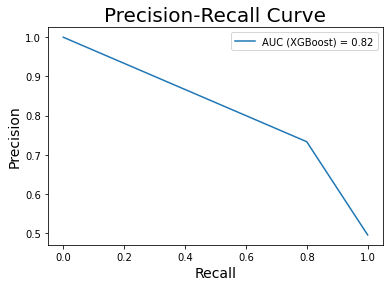

In [18]:
plt.plot(recall, precision, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend();

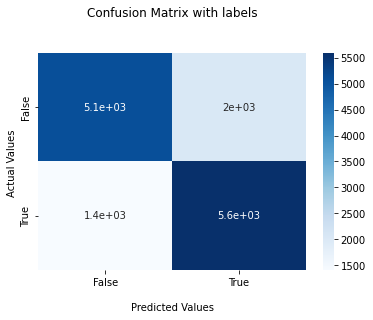

In [ ]:
cf_matrix = confusion_matrix(y_test.values.ravel(), y_prediction)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Hyperparamtere Tuning

In [ ]:
model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': 'auc',
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 200,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_seed': 123,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.5,
 'verbosity': 1}

In [8]:
def my_roc_auc_score(model, X, y): 
  return roc_auc_score(y, model.predict_proba(X)[:,1])

Create `GridSeachCV` model

In [13]:
parameters = {'learning_rate': [0.02, 0.05, 0.1, 0.3],
              'max_depth': [2, 3, 4],
              'n_estimators' : [100, 200, 300],
              'colsample_bytree': [0.8, 1]}

clf = GridSearchCV(model, 
                   parameters,
                   cv=3, 
                   scoring=my_roc_auc_score)

In [ ]:
clf.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3,
             estimator=XGBClassifier(eval_metric='auc', max_depth=4,
                                     n_estimators=200, random_seed=123,
                                     subsample=0.5),
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.02, 0.05, 0.1, 0.3],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring=<function my_roc_auc_score at 0x7f6eba3170e0>)

Save parameters

In [ ]:
file_to_store = open(base_path + "clf.pickle", "wb")
pickle.dump(clf, file_to_store)
file_to_store.close()

Load parameters

In [9]:
file_to_read = open(base_path + "clf.pickle", "rb")
clf = pickle.load(file_to_read)
file_to_read.close()

In [6]:
best_parameters = clf.best_params_
best_score = clf.best_score_
print("best parametrs: ", best_parameters)
print("best score: ", best_score)

best parametrs:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}
best score:  0.8288730561805199


In [19]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test.values.ravel(), y_pred)
print("accuracy on test set: ", accuracy)

accuracy on test set:  0.7567720489426409


precision:  [0.49501379 0.73310634 1.        ]  recall:  [1.         0.79982855 0.        ]


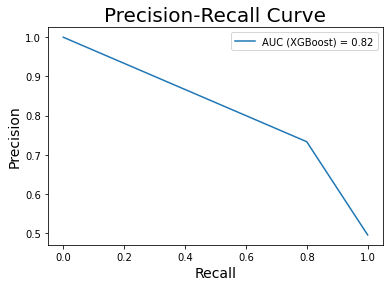

In [ ]:
# recall/precision
precision, recall, _ = precision_recall_curve(y_test.values.ravel(), y_pred)
auc_xg = auc(recall, precision)
print("precision: ", precision, " recall: ", recall)
plt.plot(recall, precision, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend();

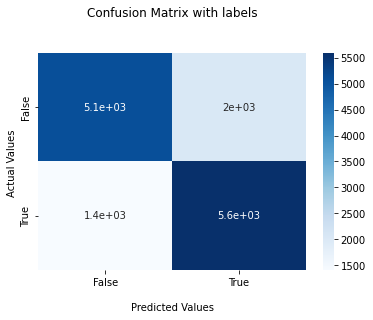

In [ ]:
# confsion matrix
cf_matrix = confusion_matrix(y_test.values.ravel(), y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Visualization

In [10]:
clf.cv_results_["params"]

[{'colsample_bytree': 0.8,
  'learning_rate': 0.02,
  'max_depth': 2,
  'n_estimators': 100},
 {'colsample_bytree': 0.8,
  'learning_rate': 0.02,
  'max_depth': 2,
  'n_estimators': 200},
 {'colsample_bytree': 0.8,
  'learning_rate': 0.02,
  'max_depth': 2,
  'n_estimators': 300},
 {'colsample_bytree': 0.8,
  'learning_rate': 0.02,
  'max_depth': 3,
  'n_estimators': 100},
 {'colsample_bytree': 0.8,
  'learning_rate': 0.02,
  'max_depth': 3,
  'n_estimators': 200},
 {'colsample_bytree': 0.8,
  'learning_rate': 0.02,
  'max_depth': 3,
  'n_estimators': 300},
 {'colsample_bytree': 0.8,
  'learning_rate': 0.02,
  'max_depth': 4,
  'n_estimators': 100},
 {'colsample_bytree': 0.8,
  'learning_rate': 0.02,
  'max_depth': 4,
  'n_estimators': 200},
 {'colsample_bytree': 0.8,
  'learning_rate': 0.02,
  'max_depth': 4,
  'n_estimators': 300},
 {'colsample_bytree': 0.8,
  'learning_rate': 0.05,
  'max_depth': 2,
  'n_estimators': 100},
 {'colsample_bytree': 0.8,
  'learning_rate': 0.05,
  'max_d

`Learning rate` and `n_estimator`

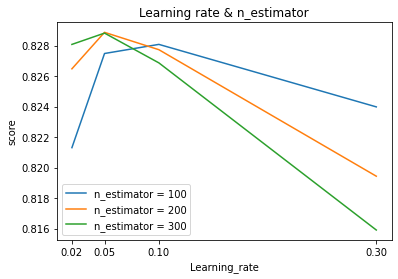

In [17]:
params = clf.cv_results_["params"]
mean_test_score = clf.cv_results_['mean_test_score']

nestimator_learningrate = {100: {0.02:_, 0.05:_, 0.1:_, 0.3:_}, 200: {0.02:_, 0.05:_, 0.1:_, 0.3:_}, 300:{0.02:_, 0.05:_, 0.1:_, 0.3:_}}
other_params = {"max_depth": 4, "colsample_bytree": 0.8}

for index, params in enumerate(params):
  if params["max_depth"] == other_params["max_depth"] and params["colsample_bytree"] == other_params["colsample_bytree"]:
    learning_rate, n_estimators = params["learning_rate"], params["n_estimators"]
    nestimator_learningrate[n_estimators][learning_rate] = mean_test_score[index]

for n_estimator, learning_rate_score in nestimator_learningrate.items():
  learningrates = list(nestimator_learningrate[n_estimator].keys())
  scores = list(nestimator_learningrate[n_estimator].values())
  plt.plot(learningrates, scores)

plt.legend(['n_estimator = 100', 'n_estimator = 200', 'n_estimator = 300'])
plt.xlabel('Learning_rate')
plt.ylabel('score')
plt.title('Learning rate & n_estimator')
plt.xticks(learningrates)
plt.show()

`Learning rate` and `max_depth`

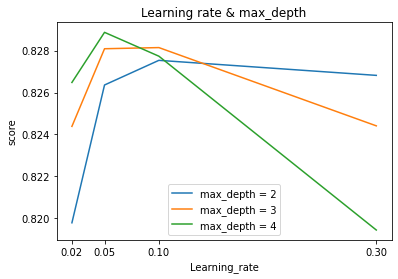

In [19]:
params = clf.cv_results_["params"]
mean_test_score = clf.cv_results_['mean_test_score']

maxdepth_learningrate = {2: {0.02:_, 0.05:_, 0.1:_, 0.3:_}, 3: {0.02:_, 0.05:_, 0.1:_, 0.3:_}, 4: {0.02:_, 0.05:_, 0.1:_, 0.3:_}}
other_params = {"n_estimators": 200, "colsample_bytree": 0.8}

for index, params in enumerate(params):
  if params["n_estimators"] == other_params["n_estimators"] and params["colsample_bytree"] == other_params["colsample_bytree"]:
    learning_rate, max_depth = params["learning_rate"], params["max_depth"]
    maxdepth_learningrate[max_depth][learning_rate] = mean_test_score[index]

for max_depth, learning_rate_score in maxdepth_learningrate.items():
  learning_rates = list(maxdepth_learningrate[max_depth].keys())
  scores = list(maxdepth_learningrate[max_depth].values())
  plt.plot()
  plt.plot(learning_rates, scores)

plt.legend(['max_depth = 2', 'max_depth = 3', 'max_depth = 4'])
plt.xlabel('Learning_rate')
plt.ylabel('score')
plt.title('Learning rate & max_depth')
plt.xticks(learning_rates)
plt.show()

here we can see that `max_depth = 4` and `learning rate = 0.05` is the best model

`Learning rate` and `colsample_bytree`

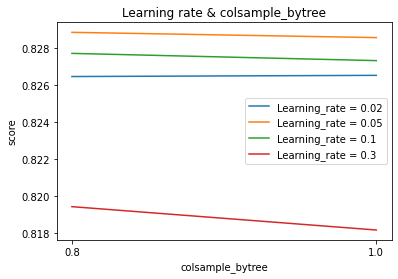

In [20]:
params = clf.cv_results_["params"]
mean_test_score = clf.cv_results_['mean_test_score']

learningrate_colsamplebytree = {0.02: {0.8:_, 1:_}, 0.05: {0.8:_, 1:_}, 0.1: {0.8:_, 1:_}, 0.3: {0.8:_, 1:_}}
other_params = {"max_depth": 4, "n_estimators": 200}

for index, params in enumerate(params):
  if params["max_depth"] == other_params["max_depth"] and params["n_estimators"] == other_params["n_estimators"]:
    learning_rate, colsample_bytree = params["learning_rate"], params["colsample_bytree"]
    learningrate_colsamplebytree[learning_rate][colsample_bytree] = mean_test_score[index]

for learning_rate, colsample_bytree_score in learningrate_colsamplebytree.items():
  colsample_bytree = list(learningrate_colsamplebytree[learning_rate].keys())
  scores = list(learningrate_colsamplebytree[learning_rate].values())
  plt.plot(colsample_bytree, scores)

plt.legend(['Learning_rate = 0.02', 'Learning_rate = 0.05', 'Learning_rate = 0.1', 'Learning_rate = 0.3'])
plt.xlabel('colsample_bytree')
plt.ylabel('score')
plt.title('Learning rate & colsample_bytree')
plt.xticks(colsample_bytree)
plt.show()

`n_estimator` and `max_depth`

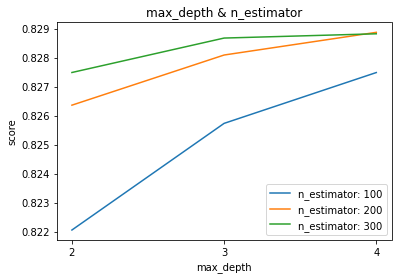

In [21]:
params = clf.cv_results_["params"]
mean_test_score = clf.cv_results_['mean_test_score']

nestimator_maxdepth = {100: {2:_, 3:_, 4:_}, 200: {2:_, 3:_, 4:_}, 300: {2:_, 3:_, 4:_}}
other_params = {"learning_rate": 0.05, "colsample_bytree": 0.8}

for index, params in enumerate(params):
  if params["learning_rate"] == other_params["learning_rate"] and params["colsample_bytree"] == other_params["colsample_bytree"]:
    n_estimators, max_depth = params["n_estimators"], params["max_depth"]
    nestimator_maxdepth[n_estimators][max_depth] = mean_test_score[index]

for n_estimator, max_depth_score in nestimator_maxdepth.items():
  max_depth = list(nestimator_maxdepth[n_estimator].keys())
  scores = list(nestimator_maxdepth[n_estimator].values())
  plt.plot(max_depth, scores)

plt.legend(["n_estimator: 100", "n_estimator: 200", "n_estimator: 300"])
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('max_depth & n_estimator')
plt.xticks(max_depth)
plt.show()

`colsample_bytree` and `n_estimator`

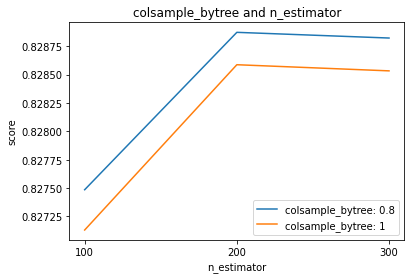

In [22]:
params = clf.cv_results_["params"]
mean_test_score = clf.cv_results_['mean_test_score']

colsamplebytree_nestimator = {0.8: {100:_, 200:_, 300:_}, 1: {100:_, 200:_, 300:_}}
other_params = {"learning_rate": 0.05, "max_depth": 4}

for index, params in enumerate(params):
  if params["learning_rate"] == other_params["learning_rate"] and params["max_depth"] == other_params["max_depth"]:
    colsample_bytree, n_estimators = params["colsample_bytree"], params["n_estimators"]
    colsamplebytree_nestimator[colsample_bytree][n_estimators] = mean_test_score[index]
  
for colsample_bytree, n_estimator_score in colsamplebytree_nestimator.items():
  n_estimator = list(colsamplebytree_nestimator[colsample_bytree].keys())
  scores = list(colsamplebytree_nestimator[colsample_bytree].values())
  plt.plot(n_estimator, scores)

plt.legend(["colsample_bytree: 0.8", "colsample_bytree: 1"])
plt.xlabel('n_estimator')
plt.ylabel('score')
plt.title('colsample_bytree and n_estimator')
plt.xticks(n_estimator)
plt.show()

`colsample_bytree` and `max_depth`

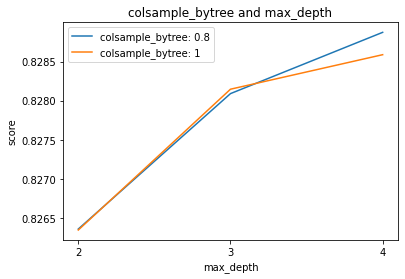

In [23]:
params = clf.cv_results_["params"]
mean_test_score = clf.cv_results_['mean_test_score']

colsamplebytree_maxdepth = {0.8: {2:_, 3:_, 4:_}, 1: {2:_, 3:_, 4:_}}
other_params = {"learning_rate": 0.05, "n_estimators": 200}

for index, params in enumerate(params):
  if params["learning_rate"] == other_params["learning_rate"] and params["n_estimators"] == other_params["n_estimators"]:
    colsample_bytree, max_depth = params["colsample_bytree"], params["max_depth"]
    colsamplebytree_maxdepth[colsample_bytree][max_depth] = mean_test_score[index]

for colsample_bytree, max_depth_score in colsamplebytree_maxdepth.items():
  max_depth = list(colsamplebytree_maxdepth[colsample_bytree].keys())
  scores = list(colsamplebytree_maxdepth[colsample_bytree].values())
  plt.plot(max_depth, scores)

plt.legend(["colsample_bytree: 0.8", "colsample_bytree: 1"])
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('colsample_bytree and max_depth')
plt.xticks(max_depth)
plt.show()